## **Task 1.1  - Line plot**

✅ Data loaded successfully!


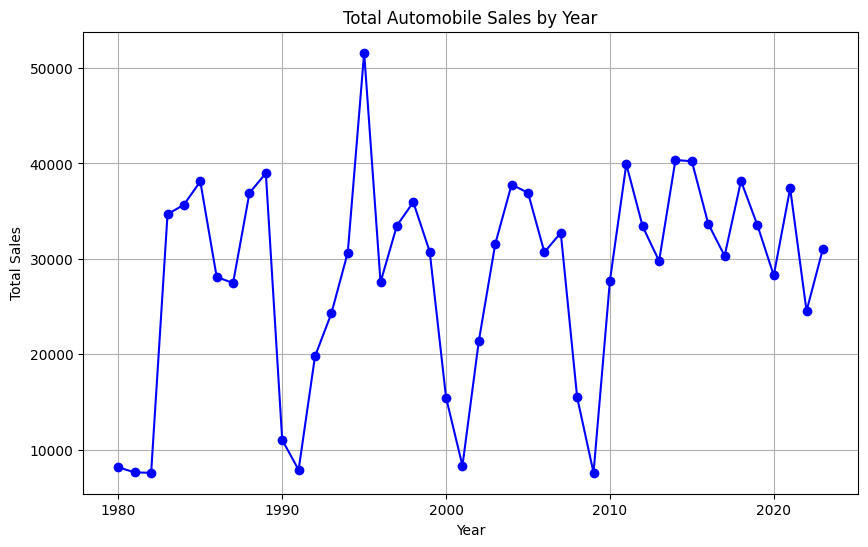

In [2]:
# Step 1: Load the data using requests and pandas
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# Dataset URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Get the content from the URL
response = requests.get(url)
data = response.content

# Read the CSV file into DataFrame
df = pd.read_csv(io.StringIO(data.decode("utf-8")))
print("✅ Data loaded successfully!")

# Step 2: Prepare the data
df["Year"] = df["Year"].astype(int)
sales_by_year = df.groupby("Year")["Automobile_Sales"].sum()

# Step 3: Plot the line chart
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind="line", marker="o", color="blue")

# Step 4: Add labels and title
plt.title("Total Automobile Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)

# Step 5: Display the chart
plt.show()


## **Task 1.2 - Line plot 2**

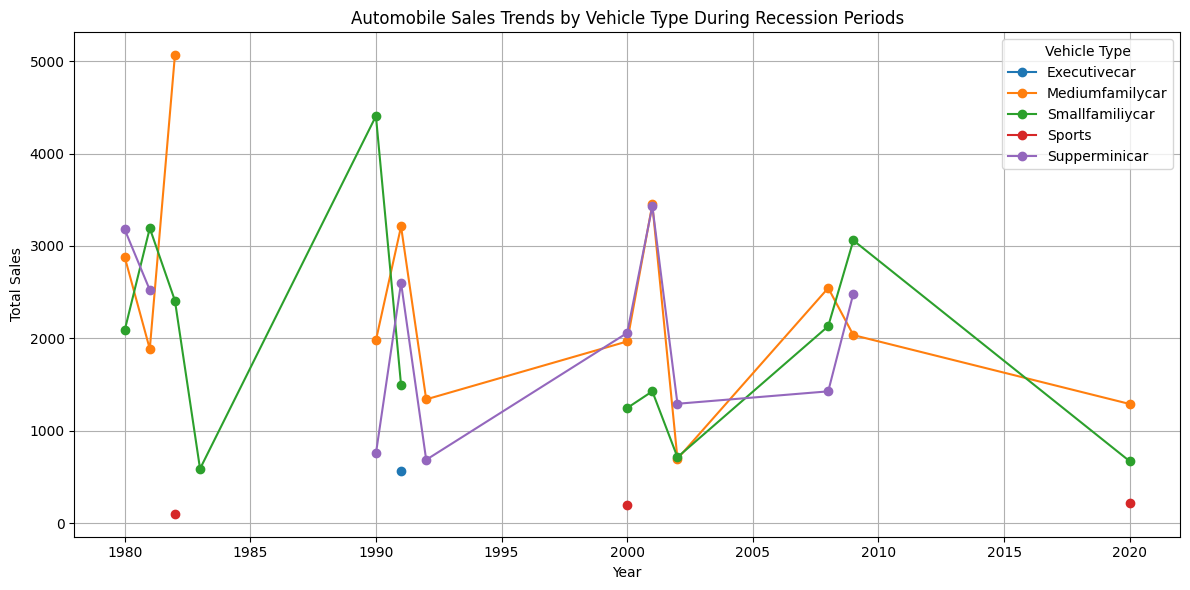

In [3]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# Step 1: Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# Step 2: Filter data for recession periods only
recession_df = df[df['Recession'] == True]

# Step 3: Group by Year and Vehicle_Type, then sum sales
grouped = recession_df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Step 4: Plot
plt.figure(figsize=(12, 6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], marker='o', label=column)

plt.title("Automobile Sales Trends by Vehicle Type During Recession Periods")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()


## **Task 1.3 - Bar Chart**

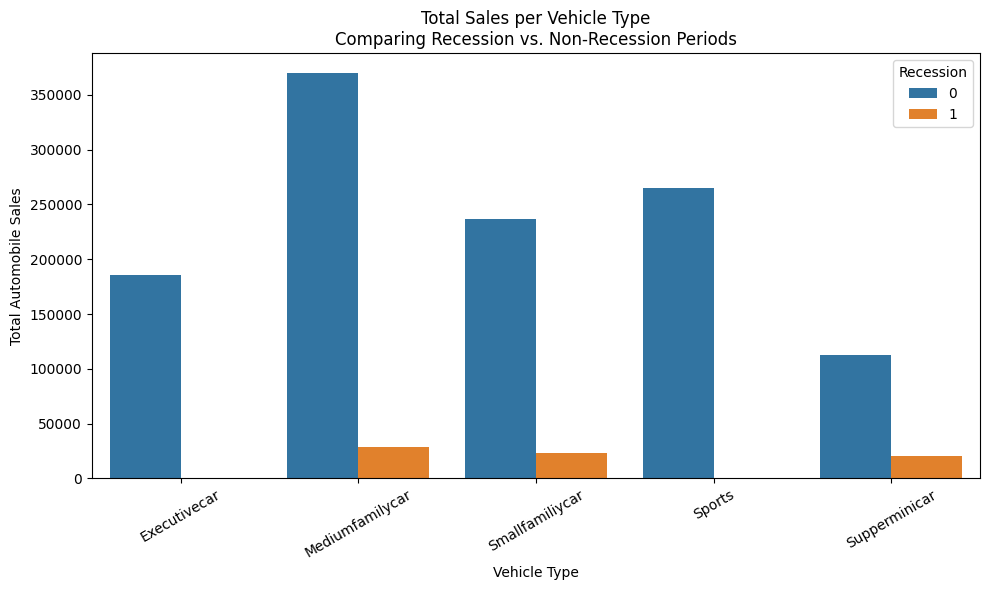

In [5]:
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# Step 2: Group data by Vehicle_Type and Recession
grouped = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()

# Step 3: Create bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')

# Step 4: Customize the chart
plt.title("Total Sales per Vehicle Type\nComparing Recession vs. Non-Recession Periods")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Automobile Sales")
plt.legend(title="Recession")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## **Task 1.4 - Subplot**

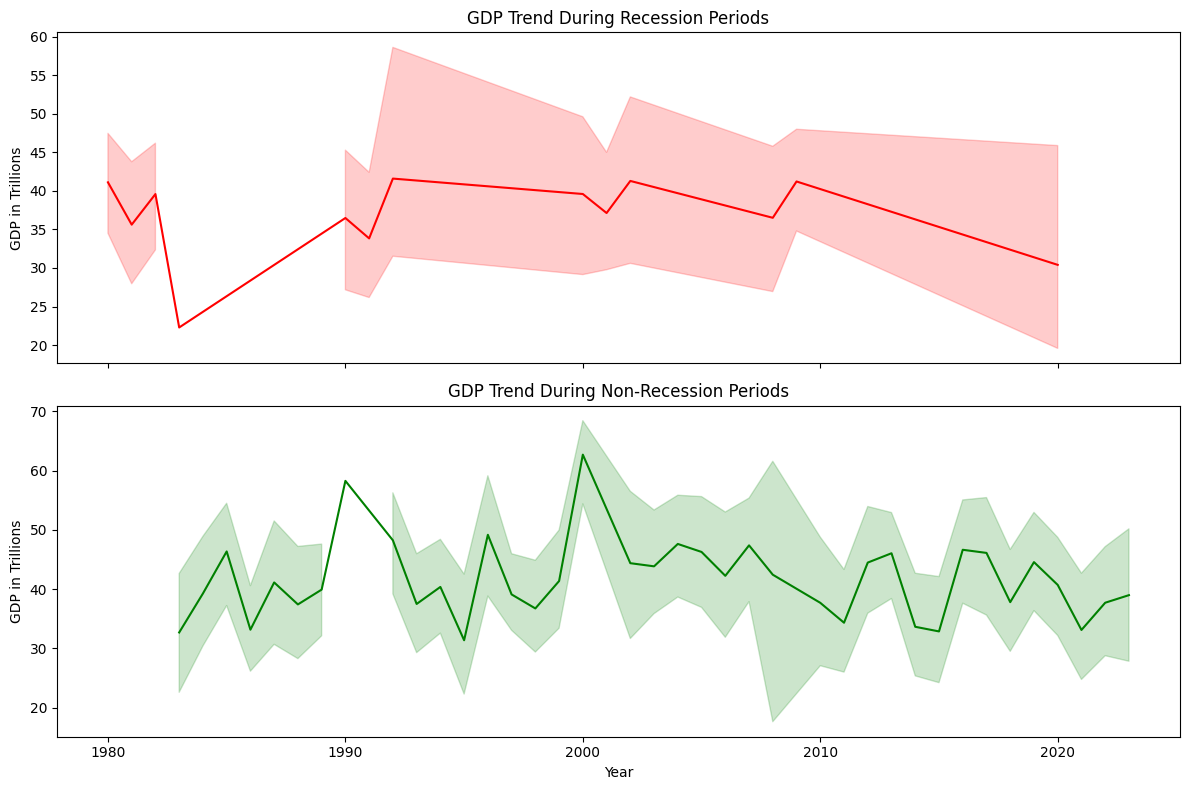

In [8]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# تقسيم البيانات إلى فترات الركود وغير الركود
gdp_recession = df[df['Recession'] == True]
gdp_non_recession = df[df['Recession'] == False]

# إنشاء subplot للمقارنة
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# الرسم لفترة الركود
sns.lineplot(data=gdp_recession, x='Year', y='GDP', ax=axes[0], color='red')
axes[0].set_title('GDP Trend During Recession Periods')
axes[0].set_ylabel('GDP in Trillions')

# الرسم لفترة عدم الركود
sns.lineplot(data=gdp_non_recession, x='Year', y='GDP', ax=axes[1], color='green')
axes[1].set_title('GDP Trend During Non-Recession Periods')
axes[1].set_ylabel('GDP in Trillions')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()


## **Task 1.5 - Bubble Plot**

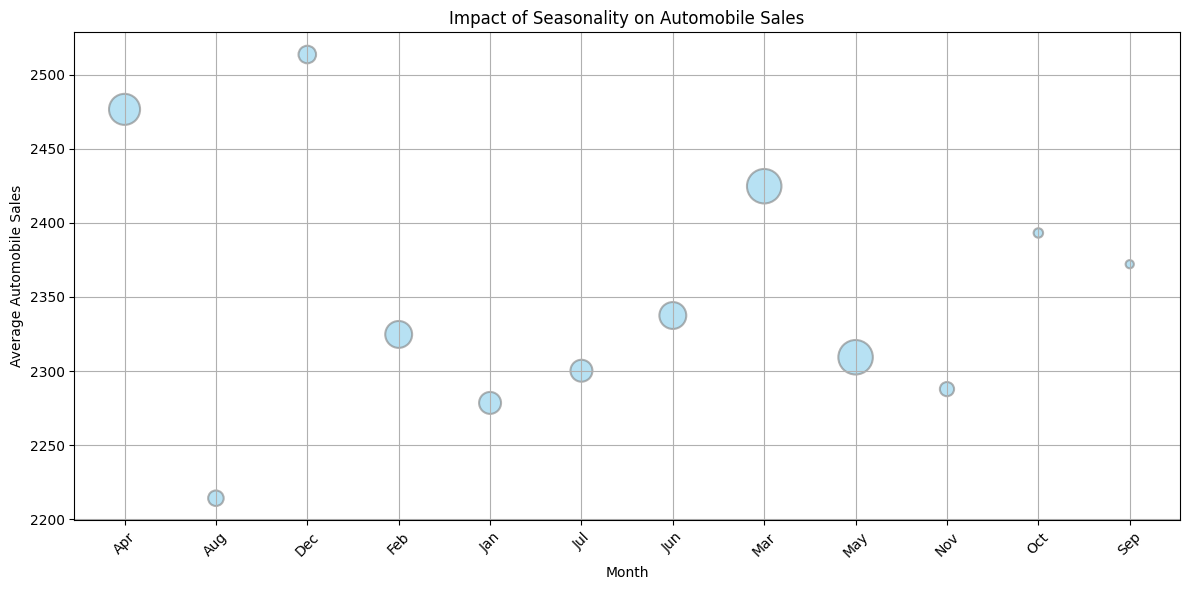

In [9]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# تحميل البيانات
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# حساب متوسط المبيعات ووزن الموسمية لكل شهر
bubble_data = df.groupby('Month')[['Automobile_Sales', 'Seasonality_Weight']].mean().reset_index()

# رسم bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    bubble_data['Month'],
    bubble_data['Automobile_Sales'],
    s=bubble_data['Seasonality_Weight'] * 500,  # حجم الفقاعات
    alpha=0.6,
    color='skyblue',
    edgecolors='grey',
    linewidth=1.5
)

plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Average Automobile Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Task 1.6 -  scatter plot**

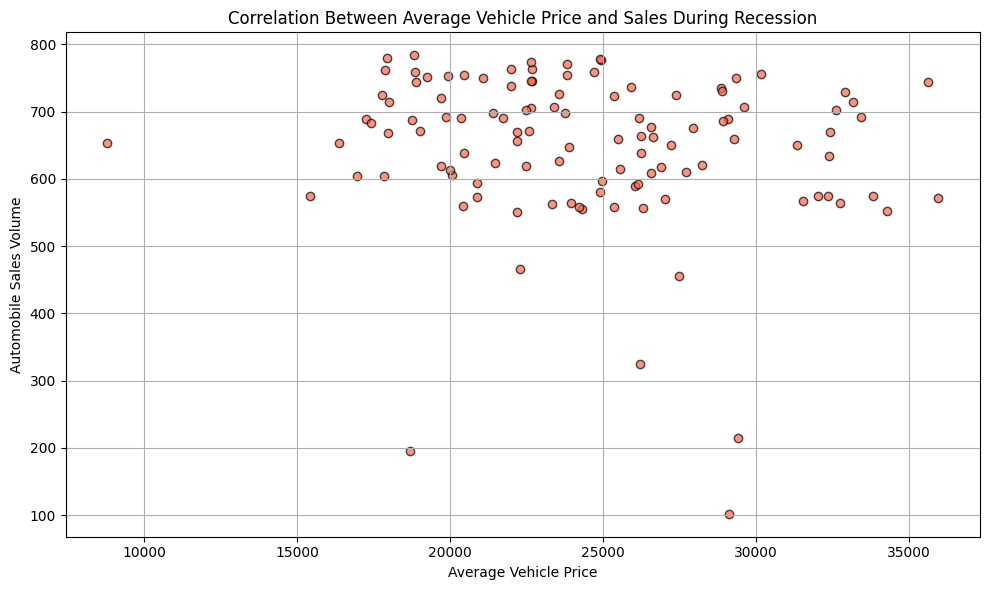

In [10]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# تحميل البيانات
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# فلترة البيانات لفترات الركود فقط
recession_df = df[df["Recession"] == True]

# رسم scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_df["Price"], recession_df["Automobile_Sales"], color="tomato", edgecolors="black", alpha=0.7)

# تخصيصات إضافية للرسم
plt.title("Correlation Between Average Vehicle Price and Sales During Recession")
plt.xlabel("Average Vehicle Price")
plt.ylabel("Automobile Sales Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Task 1.7 -  pie plot**

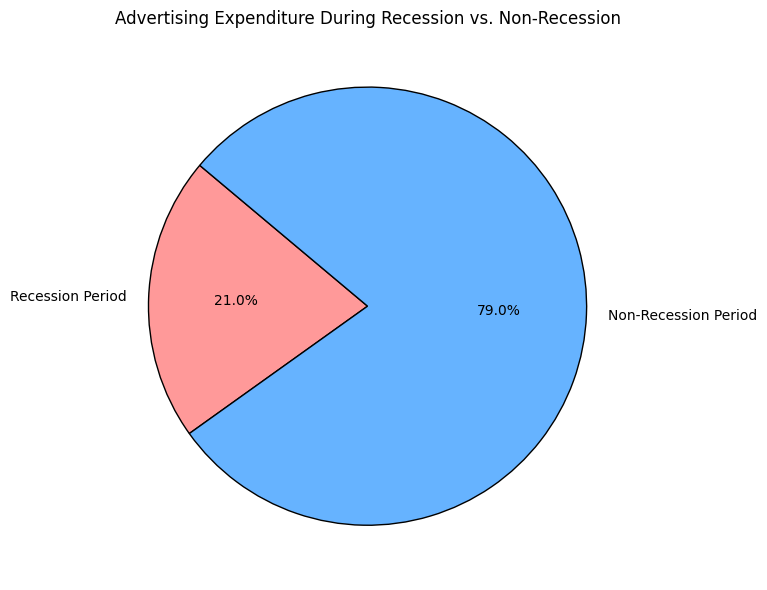

In [11]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# تحميل البيانات
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# حساب مجموع الإنفاق الإعلاني لكل فترة
recession_ad_expense = df[df["Recession"] == True]["Advertising_Expenditure"].sum()
non_recession_ad_expense = df[df["Recession"] == False]["Advertising_Expenditure"].sum()

# بيانات الرسم
labels = ["Recession Period", "Non-Recession Period"]
values = [recession_ad_expense, non_recession_ad_expense]
colors = ["#FF9999", "#66B3FF"]

# رسم المخطط الدائري
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title("Advertising Expenditure During Recession vs. Non-Recession")
plt.tight_layout()
plt.show()


## **Task 1.8 -  pie plot 2**

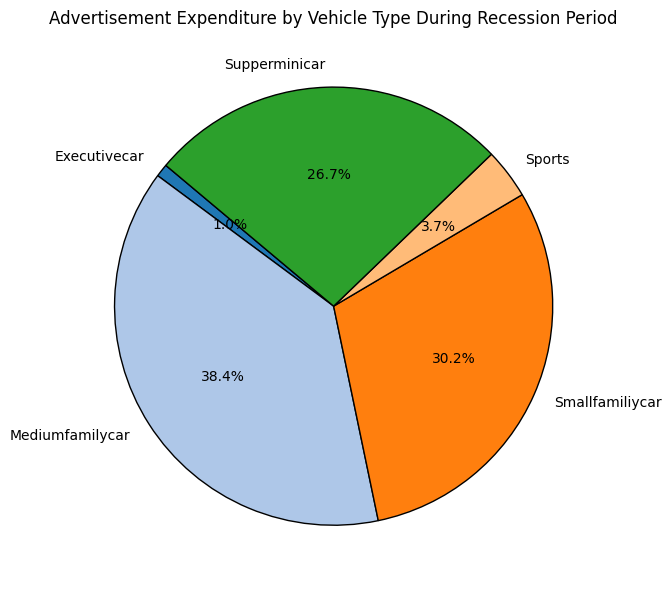

In [12]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# تحميل البيانات
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.content.decode("utf-8")))

# تصفية البيانات لفترة الركود فقط
recession_df = df[df["Recession"] == True]

# تجميع الإنفاق الإعلاني حسب نوع المركبة
ad_exp_by_vehicle = recession_df.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

# إعدادات الرسم
plt.figure(figsize=(8, 6))
colors = plt.cm.tab20.colors  # ألوان متعددة تلقائية

# رسم Pie Chart
plt.pie(
    ad_exp_by_vehicle,
    labels=ad_exp_by_vehicle.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Advertisement Expenditure by Vehicle Type During Recession Period")
plt.tight_layout()
plt.show()


## **Task 1.9 -  line plot**

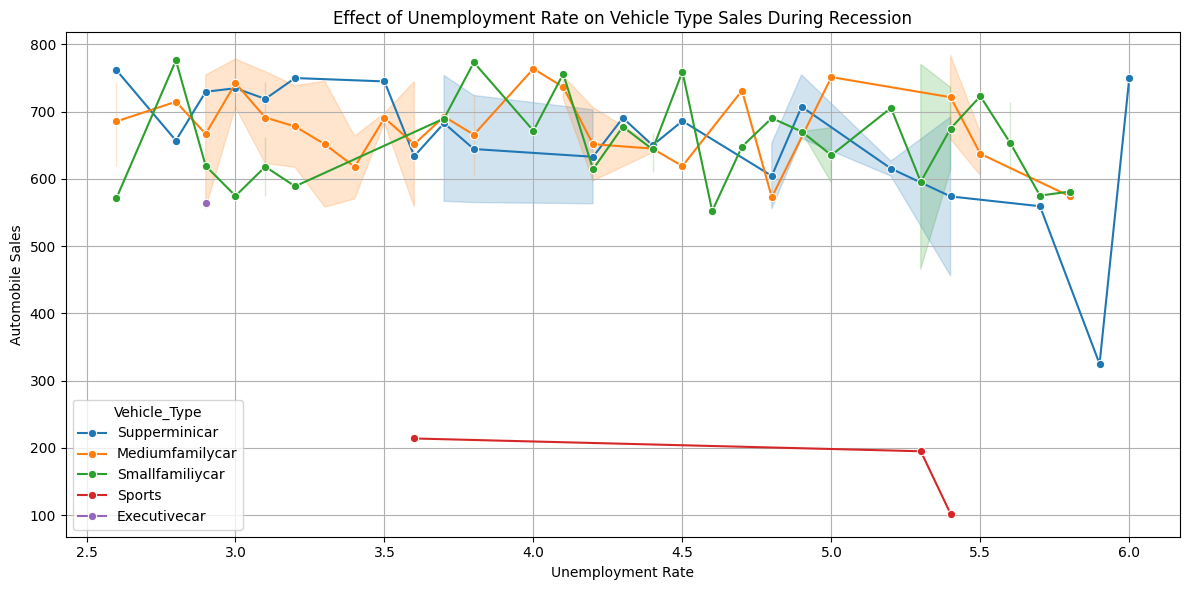

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# تصفية البيانات لفترة الركود فقط
recession_df = df[df['Recession'] == 1]

# رسم العلاقة بين معدل البطالة والمبيعات حسب نوع المركبة
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=recession_df,
    x='unemployment_rate',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    marker='o'
)

plt.title('Effect of Unemployment Rate on Vehicle Type Sales During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Task 2.1 - Create Dash**

In [22]:
from dash import Dash, html

# إنشاء التطبيق
app = Dash(__name__)

# عنوان الصفحة
app.title = 'Automobile Sales Dashboard'

# التخطيط
app.layout = html.Div(
    children=[
        html.H1(
            'XYZAutomotive Sales Dashboard',
            style={'textAlign': 'center', 'color': '#003366'}
        ),
        html.P(
            'This dashboard presents visual analytics of automobile sales during recession and non-recession periods.',
            style={'textAlign': 'center', 'color': '#333333'}
        )
    ],
    style={
        'backgroundColor': 'white',  # ✅ لون الخلفية أبيض
        'padding': '20px'
    }
)

# تشغيل التطبيق
if __name__ == '__main__':
    app.run(debug=True)


## **Task 2.2 - Add drop-down**

In [23]:
from dash import Dash, html, dcc

# إنشاء التطبيق
app = Dash(__name__)

# عنوان الصفحة
app.title = 'Automobile Sales Dashboard'

# تخطيط الصفحة مع قائمة منسدلة
app.layout = html.Div(
    children=[
        html.H1(
            'XYZAutomotive Sales Dashboard',
            style={'textAlign': 'center', 'color': '#003366'}
        ),
        
        html.P(
            'This dashboard presents visual analytics of automobile sales during recession and non-recession periods.',
            style={'textAlign': 'center', 'color': '#333333'}
        ),
        
        html.Div([
            html.Label(
                'Select Vehicle Type:',
                style={'fontWeight': 'bold', 'marginTop': '20px'}
            ),
            dcc.Dropdown(
                id='vehicle-dropdown',
                options=[
                    {'label': 'Passenger', 'value': 'Passenger'},
                    {'label': 'SUV', 'value': 'SUV'},
                    {'label': 'Light Truck', 'value': 'Light Truck'},
                    {'label': 'Pickup', 'value': 'Pickup'}
                ],
                value='Passenger',  # القيمة الافتراضية
                clearable=False,
                style={'width': '50%'}
            )
        ])
    ],
    style={
        'backgroundColor': 'white',
        'padding': '20px'
    }
)

# تشغيل التطبيق
if __name__ == '__main__':
    app.run(debug=True)


## **Task 2.3 - outputdiv**



In [24]:
from dash import Dash, html, dcc

# إنشاء التطبيق
app = Dash(__name__)
app.title = 'Automobile Sales Dashboard'

# تخطيط الصفحة
app.layout = html.Div(
    children=[
        html.H1(
            'XYZAutomotive Sales Dashboard',
            style={'textAlign': 'center', 'color': '#003366'}
        ),
        
        html.P(
            'This dashboard presents visual analytics of automobile sales during recession and non-recession periods.',
            style={'textAlign': 'center', 'color': '#333333'}
        ),
        
        html.Div([
            html.Label(
                'Select Vehicle Type:',
                style={'fontWeight': 'bold', 'marginTop': '20px'}
            ),
            dcc.Dropdown(
                id='vehicle-dropdown',
                options=[
                    {'label': 'Passenger', 'value': 'Passenger'},
                    {'label': 'SUV', 'value': 'SUV'},
                    {'label': 'Light Truck', 'value': 'Light Truck'},
                    {'label': 'Pickup', 'value': 'Pickup'}
                ],
                value='Passenger',
                clearable=False,
                style={'width': '50%'}
            )
        ]),

        html.Br(),

        # ✅ قسم عرض النتائج
        html.Div(
            id='output-container',
            className='output-display',
            children='Selected vehicle data will appear here.',
            style={
                'padding': '10px',
                'border': '1px solid #ccc',
                'backgroundColor': '#f9f9f9',
                'marginTop': '20px'
            }
        )
    ],
    style={
        'backgroundColor': 'white',
        'padding': '20px'
    }
)

# تشغيل التطبيق
if __name__ == '__main__':
    app.run(debug=True)


## **Task 2.4 - Creating Callbacks**

In [25]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

# إنشاء التطبيق
app = Dash(__name__)
app.title = 'Automobile Sales Dashboard'

# تخطيط الصفحة
app.layout = html.Div(
    children=[
        html.H1(
            'XYZAutomotive Sales Dashboard',
            style={'textAlign': 'center', 'color': '#003366'}
        ),
        
        html.P(
            'This dashboard presents visual analytics of automobile sales during recession and non-recession periods.',
            style={'textAlign': 'center', 'color': '#333333'}
        ),
        
        html.Div([
            html.Label(
                'Select Vehicle Type:',
                style={'fontWeight': 'bold', 'marginTop': '20px'}
            ),
            dcc.Dropdown(
                id='vehicle-dropdown',
                options=[
                    {'label': 'Passenger', 'value': 'Passenger'},
                    {'label': 'SUV', 'value': 'SUV'},
                    {'label': 'Light Truck', 'value': 'Light Truck'},
                    {'label': 'Pickup', 'value': 'Pickup'}
                ],
                value='Passenger',
                clearable=False,
                style={'width': '50%'}
            )
        ]),

        html.Br(),

        # قسم عرض النتائج
        html.Div(
            id='output-container',
            className='output-display',
            children='Selected vehicle data will appear here.',
            style={
                'padding': '10px',
                'border': '1px solid #ccc',
                'backgroundColor': '#f9f9f9',
                'marginTop': '20px'
            }
        )
    ],
    style={
        'backgroundColor': 'white',
        'padding': '20px'
    }
)

# ✅ Callback لتحديث قسم الإخراج بناءً على الاختيار
@app.callback(
    Output('output-container', 'children'),
    Input('vehicle-dropdown', 'value')
)
def update_output(selected_vehicle):
    return f"You have selected the vehicle type: {selected_vehicle}"

# تشغيل التطبيق
if __name__ == '__main__':
    app.run(debug=True)


## **Task 2.5 - RecessionReportgraphs**

In [27]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import requests
import io

# قراءة البيانات من الرابط مباشرة
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

# تصفية البيانات لفترة الركود فقط
recession_df = df[df['Recession'] == 1]

# إنشاء تطبيق Dash
app = Dash(__name__)
app.title = "Recession Report Dashboard"

# تخطيط الواجهة
app.layout = html.Div([
    html.H1("XYZAutomotive - Recession Statistics", style={'textAlign': 'center', 'color': '#003366'}),

    html.Label("Select a Recession Statistic:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='recession-stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'},
            {'label': 'Consumer Confidence', 'value': 'Consumer_Confidence'},
        ],
        value='Automobile_Sales',
        style={'width': '60%'}
    ),

    html.Br(),

    dcc.Graph(id='recession-stat-graph'),

], style={'padding': '20px', 'backgroundColor': 'white'})

# ✅ Callback لتحديث الرسم البياني حسب الإحصائية المختارة
@app.callback(
    Output('recession-stat-graph', 'figure'),
    Input('recession-stat-dropdown', 'value')
)
def update_recession_graph(stat_column):
    fig = px.line(
        recession_df,
        x='Date',
        y=stat_column,
        title=f'{stat_column.replace("_", " ")} during Recession Period',
        markers=True
    )
    fig.update_layout(template='plotly_white', title_x=0.5)
    return fig

# تشغيل الخادم
if __name__ == '__main__':
    app.run(debug=True)


## **Task 2.6 - YearlyReportgraphs**

In [28]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# قراءة البيانات مباشرة من الرابط
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# إنشاء تطبيق Dash
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"

# ================== Layout ==================
app.layout = html.Div(style={'backgroundColor': 'white', 'padding': '20px'}, children=[
    html.H1("Automobile Sales Report Dashboard", style={'textAlign': 'center', 'color': '#333'}),

    # Recession Statistics Section
    html.H2("📉 Recession Period Statistics", style={'marginTop': '40px'}),
    html.Label("Select a Statistic:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='recession-stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'Advertising Expenditure', 'value': 'Advertising_Expenditure'},
            {'label': 'Vehicle Type Sales', 'value': 'Vehicle_Type'},
        ],
        value='Automobile_Sales',
        style={'width': '60%'}
    ),
    dcc.Graph(id='recession-stat-graph'),

    html.Hr(),

    # Yearly Statistics Section
    html.H2("📊 Yearly Statistics Overview", style={'marginTop': '40px'}),
    html.Label("Select a Yearly Statistic:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='yearly-stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'},
            {'label': 'Consumer Confidence', 'value': 'Consumer_Confidence'},
            {'label': 'GDP in Trillions', 'value': 'GDP_in_Trillions'}
        ],
        value='Automobile_Sales',
        style={'width': '60%'}
    ),
    dcc.Graph(id='yearly-stat-graph')
])

# ================== Callbacks ==================
@app.callback(
    Output('recession-stat-graph', 'figure'),
    Input('recession-stat-dropdown', 'value')
)
def update_recession_graph(stat_column):
    recession_df = df[df['Recession'] == True]

    if stat_column == 'Vehicle_Type':
        data = recession_df.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        fig = px.bar(data, x='Vehicle_Type', y='Automobile_Sales',
                     title='Total Sales by Vehicle Type During Recession')
    else:
        grouped = recession_df.groupby('Date')[stat_column].mean().reset_index()
        fig = px.line(grouped, x='Date', y=stat_column,
                      title=f'{stat_column.replace("_", " ")} During Recession', markers=True)

    fig.update_layout(template='plotly_white', title_x=0.5)
    return fig

@app.callback(
    Output('yearly-stat-graph', 'figure'),
    Input('yearly-stat-dropdown', 'value')
)
def update_yearly_graph(stat_column):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    yearly_df = df.groupby('Year')[stat_column].mean().reset_index()

    fig = px.line(yearly_df, x='Year', y=stat_column,
                  title=f'{stat_column.replace("_", " ")} Yearly Trend', markers=True)
    fig.update_layout(template='plotly_white', title_x=0.5)
    return fig

# ================== Run App ==================
if __name__ == '__main__':
    app.run(debug=True)


In [29]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# قراءة البيانات مباشرة من الرابط
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# إنشاء تطبيق Dash
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"

# ================== Layout ==================
app.layout = html.Div(style={'backgroundColor': 'white', 'padding': '20px'}, children=[
    html.H1("Automobile Sales Report Dashboard", style={'textAlign': 'center', 'color': '#333'}),

    # Recession Statistics Section
    html.H2("📉 Recession Period Statistics", style={'marginTop': '40px'}),
    html.Label("Select a Statistic:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='recession-stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'Advertising Expenditure', 'value': 'Advertising_Expenditure'},
            {'label': 'Vehicle Type Sales', 'value': 'Vehicle_Type'},
        ],
        value='Automobile_Sales',
        style={'width': '60%'}
    ),
    dcc.Graph(id='recession-stat-graph'),

    html.Hr(),

    # Yearly Statistics Section
    html.H2("📊 Yearly Statistics Overview", style={'marginTop': '40px'}),
    html.Label("Select a Yearly Statistic:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='yearly-stat-dropdown',
        options=[
            {'label': 'Automobile Sales', 'value': 'Automobile_Sales'},
            {'label': 'Unemployment Rate', 'value': 'unemployment_rate'},
            {'label': 'Consumer Confidence', 'value': 'Consumer_Confidence'},
            {'label': 'GDP in Trillions', 'value': 'GDP_in_Trillions'}
        ],
        value='Automobile_Sales',
        style={'width': '60%'}
    ),
    dcc.Graph(id='yearly-stat-graph')
])


In [30]:
# ================== Callbacks ==================
@app.callback(
    Output('recession-stat-graph', 'figure'),
    Input('recession-stat-dropdown', 'value')
)
def update_recession_graph(stat_column):
    recession_df = df[df['Recession'] == True]

    if stat_column == 'Vehicle_Type':
        data = recession_df.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
        fig = px.bar(data, x='Vehicle_Type', y='Automobile_Sales',
                     title='Total Sales by Vehicle Type During Recession')
    else:
        grouped = recession_df.groupby('Date')[stat_column].mean().reset_index()
        fig = px.line(grouped, x='Date', y=stat_column,
                      title=f'{stat_column.replace("_", " ")} During Recession', markers=True)

    fig.update_layout(template='plotly_white', title_x=0.5)
    return fig

@app.callback(
    Output('yearly-stat-graph', 'figure'),
    Input('yearly-stat-dropdown', 'value')
)
def update_yearly_graph(stat_column):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    yearly_df = df.groupby('Year')[stat_column].mean().reset_index()

    fig = px.line(yearly_df, x='Year', y=stat_column,
                  title=f'{stat_column.replace("_", " ")} Yearly Trend', markers=True)
    fig.update_layout(template='plotly_white', title_x=0.5)
    return fig

# ================== Run App ==================
if __name__ == '__main__':
    app.run(debug=True)